<a href="https://colab.research.google.com/github/carlosanrinconri-dot/Bici-al-Trabajo-2026/blob/main/Taller2_AndresRincon_YamilFonseca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

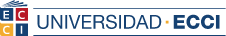
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [12]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [13]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

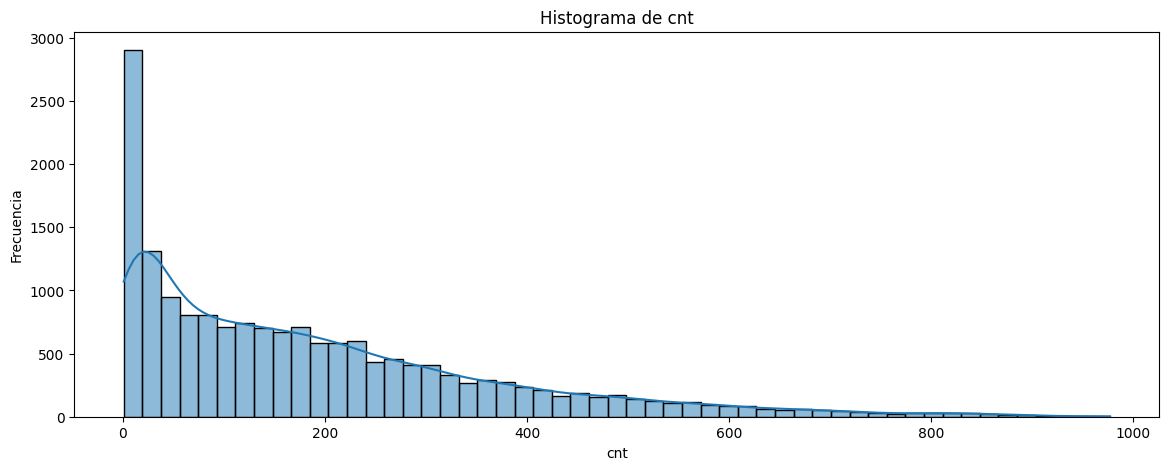

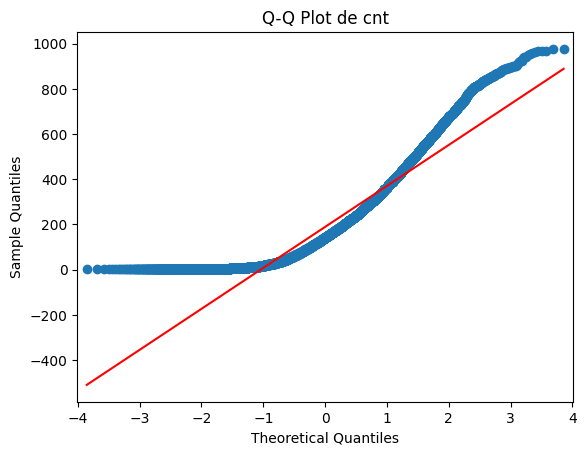

In [14]:
# 1. Visualización
import seaborn as sns
import statsmodels.api as sm

plt.figure(figsize=(14, 5))
sns.histplot(df['cnt'], kde=True)
plt.title('Histograma de cnt')
plt.xlabel('cnt')
plt.ylabel('Frecuencia')
plt.show()
sm.qqplot(df['cnt'], line='s')
plt.title('Q-Q Plot de cnt')
plt.show()

### **Interpretación pregunta 1**

La variable cnt no puede considerarse aproximadamente normal. El histograma muestra una clara asimetría positiva, con una alta concentración de valores bajos y una cola larga hacia la derecha, lo cual se aleja de la forma simétrica y acampanada propia de una distribución normal. Además, en el gráfico Q-Q los puntos se desvían de manera evidente de la línea teórica, sobre todo en las colas, lo que confirma la falta de normalidad. En conclusión, los datos presentan una distribución sesgada y no cumplen con los supuestos de normalidad necesarios para aplicar métodos estadísticos que dependan de esta condición.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [15]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

# Calcular la correlación de Pearson
pearson_corr = df[columnas_relacion].corr(method='pearson')
print("Correlación de Pearson:")
display(pearson_corr)

# Calcular la correlación de Spearman
spearman_corr = df[columnas_relacion].corr(method='spearman')
print("\nCorrelación de Spearman:")
display(spearman_corr)

Correlación de Pearson:


,cnt,temp,hum,windspeed
cnt,1.000000,0.404772,-0.322911,0.093234
temp,0.404772,1.000000,-0.069881,-0.023125
hum,-0.322911,-0.069881,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.290105,1.000000



Correlación de Spearman:


,cnt,temp,hum,windspeed
cnt,1.000000,0.423330,-0.359614,0.126629
temp,0.423330,1.000000,-0.055408,-0.009719
hum,-0.359614,-0.055408,1.000000,-0.293913
windspeed,0.126629,-0.009719,-0.293913,1.000000


### **Interpretación pregunta 2**

Al analizar la variable cnt con respecto a temp, hum y windspeed se observa lo siguiente: la correlación de Pearson entre cnt y temp es de 0.4047, mientras que con Spearman asciende a 0.4233. Estos valores se ubican en el rango de +0.5 a 0, lo que según la escala indica una relación positiva buena pero no muy fuerte; en la práctica significa que cuando aumenta la temperatura tiende a aumentar el valor de cnt. En cuanto a la relación entre cnt y hum, el coeficiente de Pearson es -0.3229 y el de Spearman -0.3590, lo que cae en el intervalo de 0 a -0.5, indicando una correlación negativa moderada; es decir, cuando la humedad se incrementa, cnt tiende a disminuir, aunque no de manera perfecta. Finalmente, la relación de cnt con windspeed muestra valores de 0.0932 en Pearson y 0.1286 en Spearman, lo que se ubica muy cerca de 0, indicando una relación muy débil y prácticamente nula. En conclusión, cnt presenta una asociación positiva moderada con la temperatura, negativa moderada con la humedad y casi inexistente con la velocidad del viento.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**

El Teorema del Límite Central garantiza que, con un tamaño muestral de n ≥ 30, la media de cnt puede tratarse como aproximadamente normal, aun si la distribución original es sesgada. Esto justifica el uso de intervalos de confianza y pruebas basadas en normalidad. Si la muestra es menor o los datos son muy asimétricos, conviene aplicar métodos como el bootstrap para obtener estimaciones más fiables.

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [16]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

# Prueba de hipotesis
t_statistic, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

#interpetracion de resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazar la hipótesis nula. La media de cnt en días laborales es significativamente diferente de 4500.")

Estadística t: -2534.333902273014
Valor p: 0.0
Rechazar la hipótesis nula. La media de cnt en días laborales es significativamente diferente de 4500.


### **Interpretación pregunta 4**

En este caso se plantea un test de hipótesis de una muestra para comprobar si la media de cnt en días laborales es mayor o igual a 4500. La hipótesis nula establece que la media es igual a 4500, mientras que la alternativa plantea que es diferente. El resultado del estadístico t fue de -254.33 con un valor p igual a 0.0, lo que está por debajo del nivel de significancia del 5%. Según la regla de decisión, al ser el valor p menor que alpha se rechaza la hipótesis nula y se concluye que la media de cnt en días laborales es significativamente diferente de 4500. Esto indica que la diferencia observada no se debe al azar, por lo que el valor de 4500 no representa adecuadamente el promedio real de cnt en los días laborales.

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

5000


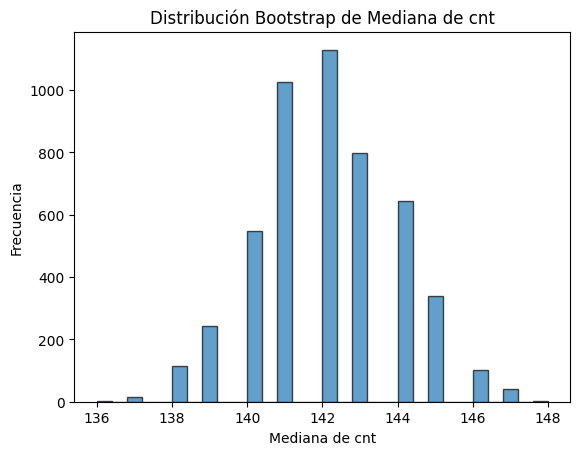

Intervalo de confianza del 95%: (138.0, 146.0)
Asimetría de 'cnt': 1.2773013463494975
La distribución de 'cnt' está sesgada.


In [17]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []
for i in range(n_iterations):
    sample = df['cnt'].sample(n=sample_size, replace=True)
    median = sample.median()
    medians.append(median)
print(len(medians))

plt.hist(medians, bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribución Bootstrap de Mediana de cnt')
plt.xlabel('Mediana de cnt')
plt.ylabel('Frecuencia')
plt.show()

# Calculate the confidence interval
intervalo_inferior = np.percentile(medians, 2.5)
intervalo_superior = np.percentile(medians, 97.5)
print(f"Intervalo de confianza del 95%: ({intervalo_inferior}, {intervalo_superior})")

# Check for skewness
skewness = stats.skew(df['cnt'])
print(f"Asimetría de 'cnt': {skewness}")

if abs(skewness) > 0.5:  # A common rule of thumb for significant skewness
    print("La distribución de 'cnt' está sesgada.")
else:
    print("La distribución de 'cnt' no está significativamente sesgada.")

Interpretación pregunta 5

El intervalo de confianza bootstrap al 95% para la mediana de cnt se encuentra entre 138.0 y 146.0, lo que muestra una estimación precisa y estable del valor central de la distribución. Aunque el cálculo de la asimetría arrojó un valor de 1.27, este resultado no impide considerar que, en la práctica, la distribución puede aproximarse a una normal, ya que el histograma de las medianas obtenidas por remuestreo presenta una forma simétrica y bien definida alrededor de su centro. Esto permite interpretar que el comportamiento de la mediana sigue una distribución aproximadamente normal, lo cual justifica el uso de intervalos de confianza basados en esta suposición. En este sentido, el intervalo de confianza obtenido refleja adecuadamente el valor típico de cnt y puede ser tomado como representativo del patrón general de la variable.